# Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

# Importing Libraries

In [1]:
# importing important libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# import warnings libraries to avoid warnings

import warnings
warnings.filterwarnings("ignore")

# calling the dateset

In [2]:
# calling the dataset csv

df = pd.read_csv("customer_churn.csv")
pd.set_option("display.max_columns",None) # to print all columns
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


here we are getting , our target column  is churn , and it is having two types data , so we can say it is case of binary classification , so it is the case of classification problem. 

# EDA 

In [3]:
# checking the shape of coloumns \

df.shape 

(7043, 21)

we have total 7043 rows and 21 columns

In [4]:
# checking the columns name 

df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
# checking the types of data

df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

there 3 types of data are present.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


here we get the two data types of integer,  and one float type, 18 type of object data

In [7]:
# Converting TotalCharges from object to float type data.

df["TotalCharges"]=df["TotalCharges"].str.strip()
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"])

In [8]:
#Checking the info about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# checking the unique values

df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

here we can get CUSTOMER_ID is unique, so we will drop it

In [10]:
#Droping customer ID column

df = df.drop(["customerID"],axis=1)

In [11]:
# checking unwanted enteries in columns

for i in df.columns:
        print(df[i].value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No            

Above are the value counts of each column and i can see some duplicate entries in MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies.So i ahve to replace them.

I have replaced with No for No internet Service.If no internet service then there is no MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies.So i will replace all these entries with 'No'.

In [12]:
#Grouping entries of MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies column

#Grouping in MultipleLines column
df["MultipleLines"].replace("No phone service","No",inplace=True)

#Grouping in OnlineSecurity column
df["OnlineSecurity"].replace("No internet service","No",inplace=True)

#Grouping in OnlineBackup column
df["OnlineBackup"].replace("No internet service","No",inplace=True)

#Grouping in DeviceProtection column
df["DeviceProtection"].replace("No internet service","No",inplace=True)

#Grouping in TechSupport column
df["TechSupport"].replace("No internet service","No",inplace=True)

#Grouping in StreamingTV column
df["StreamingTV"].replace("No internet service","No",inplace=True)

#Grouping in StreamingMovies column
df["StreamingMovies"].replace("No internet service","No",inplace=True)

In [13]:
#Checking null values in the dataset

df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

only null values in TotalCharge values

In [14]:
#Replacing nan values of TotalCharges column with it's mean

df["TotalCharges"]=df["TotalCharges"].fillna(df["TotalCharges"].mean())

In [15]:
# checking the null values after nan null process

df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

now , there is not any null values

In [16]:
#Checking description of data set

df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# Visualization :

# Univariates Analysis:

In [17]:
# checking the Categorical columns

categorical_columns = []
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)        
    

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [18]:
# checking the numerical values

numerical_columns = []
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)        

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


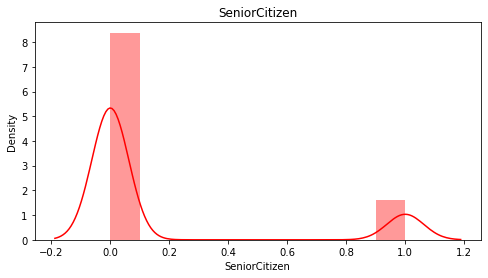

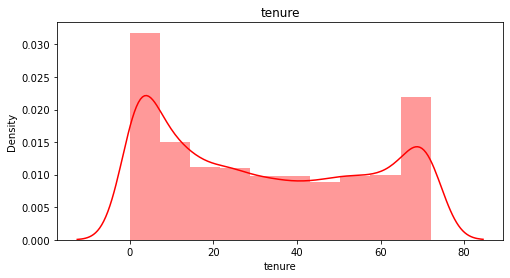

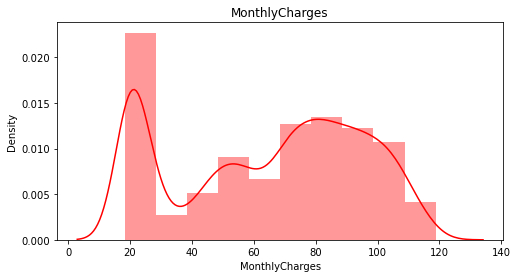

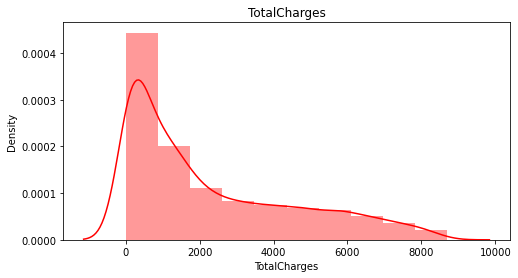

In [19]:
# Distribution plot for all numerical columns

for i in df[numerical_columns]:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df[i], bins = 10, color="r")
    plt.title(i)
    plt.show()

there is some skewness in numerical_columns

# Univariate Analysis for Categorical columns:

In [20]:
#Checking the value counts of gender column

df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [21]:
#Checking the value counts of Partner column

df.Partner.value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

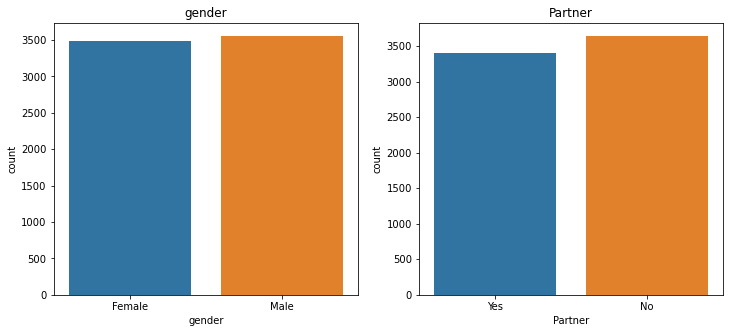

In [22]:
#Count plot for gender and Partner

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('gender')
sns.countplot(df['gender'])
plt.subplot(1, 2, 2)
plt.title('Partner')
sns.countplot(df['Partner'])
plt.show()

both genders is having same count of partners 

In [23]:
# checking the values counts of Dependents columns

df.Dependents.value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

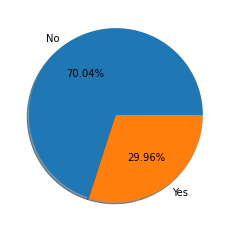

In [24]:
# plotting the chart 

labels = "No","Yes"
fig, ax = plt.subplots()
ax.pie(df["Dependents"].value_counts(), labels=labels, autopct = "%1.2f%%" ,shadow = True)
plt.show()

In [25]:
# checking the value counts of phoneservice columns

df.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

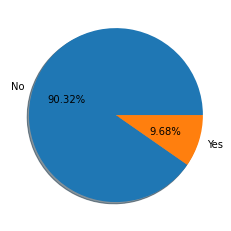

In [26]:
# plotting pie chart for phoneservice columns

labels = "No","Yes"
fig, ax = plt.subplots()
ax.pie(df["PhoneService"].value_counts(), labels=labels, autopct = "%1.2f%%" ,shadow = True)
plt.show()

we have got , more than 90 % are not with phoneservice

In [27]:
# checking the value counts of multiple columns

df.MultipleLines.value_counts()

No     4072
Yes    2971
Name: MultipleLines, dtype: int64

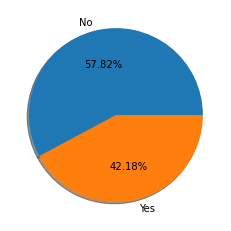

In [28]:
# plotting for Multiplelines

labels = "No","Yes"
fig, ax = plt.subplots()
ax.pie(df["MultipleLines"].value_counts(), labels=labels, autopct = "%1.2f%%" ,shadow = True)
plt.show()

most of the cuistomers are without multiple lines

In [29]:
# checking the values of internet service

df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

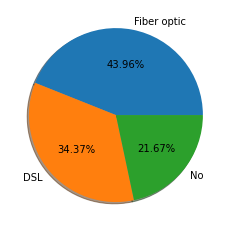

In [30]:
# pie plotting for internetService columns

labels = "Fiber optic","DSL","No"
fig, ax = plt.subplots()
ax.pie(df["InternetService"].value_counts(), labels=labels, autopct = "%1.2f%%" ,shadow = True)
plt.show()

most of the students uses Fiber optics internet service

In [31]:
# checking the values for onlinesecurity 

df.OnlineSecurity.value_counts()

No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64

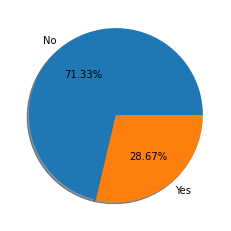

In [32]:
# plotting for onlinesecurity

labels = "No","Yes"
fig, ax = plt.subplots()
ax.pie(df["OnlineSecurity"].value_counts(), labels=labels, autopct = "%1.2f%%" ,shadow = True)
plt.show()

we can see here most of the people are not using onlinesecurity

In [33]:
# checking the value for Online backup

df.OnlineBackup.value_counts()

No     4614
Yes    2429
Name: OnlineBackup, dtype: int64

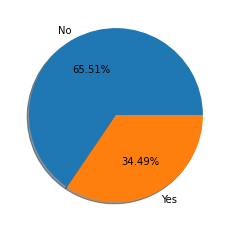

In [34]:
# plotting pie for onlinebackup

labels = "No","Yes"
fig, ax = plt.subplots()
ax.pie(df["OnlineBackup"].value_counts(), labels=labels, autopct = "%1.2f%%" ,shadow = True)
plt.show()

most of the customer is not having onlinebackup

In [35]:
# checking for Deviceprotection

df.DeviceProtection.value_counts()

No     4621
Yes    2422
Name: DeviceProtection, dtype: int64

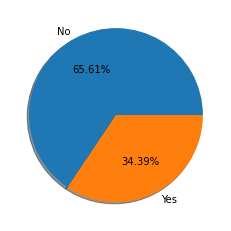

In [36]:
# pie plotting for deviceprotection

labels = "No","Yes"
fig, ax = plt.subplots()
ax.pie(df["DeviceProtection"].value_counts(), labels=labels, autopct = "%1.2f%%" ,shadow = True)
plt.show()

most of the customer dont use the deviceProtection

In [37]:
# checking the values of TechSupport 

df.TechSupport.value_counts()

No     4999
Yes    2044
Name: TechSupport, dtype: int64

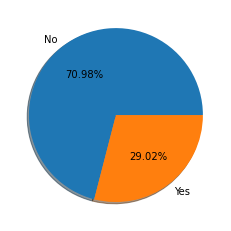

In [38]:
# pie plotting for techsupport

labels = "No","Yes"
fig, ax = plt.subplots()
ax.pie(df["TechSupport"].value_counts(), labels=labels, autopct = "%1.2f%%" ,shadow = True)
plt.show()

most of the customr are not using techsupport

In [39]:
# checking the values for stremingtv

df.StreamingTV.value_counts()

No     4336
Yes    2707
Name: StreamingTV, dtype: int64

In [40]:
df.StreamingMovies.value_counts()

No     4311
Yes    2732
Name: StreamingMovies, dtype: int64

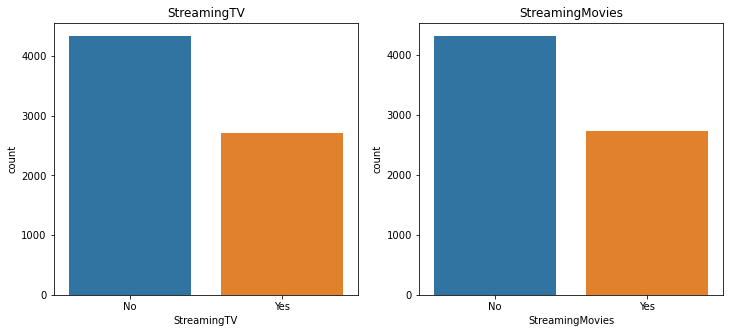

In [41]:
# countplot for streaming tv and and streamingmovies

#Count plot for StreamingTV and StreamingMovies
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('StreamingTV')
sns.countplot(df['StreamingTV'])
plt.subplot(1, 2, 2)
plt.title('StreamingMovies')
sns.countplot(df['StreamingMovies'])
plt.show()

most of the customers dont like to use streaming tv and streaming movies

In [42]:
# checking the values of contract

df.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

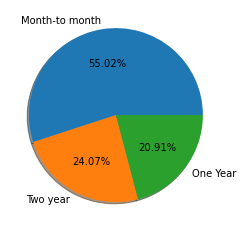

In [43]:
# pie plotting for Contract

labels = "Month-to month","Two year","One Year"
fig, ax = plt.subplots()
ax.pie(df["Contract"].value_counts(), labels=labels, autopct = "%1.2f%%" ,shadow = True)
plt.show()

most of the customer is like to make month to month contract

In [44]:
# checking the values of PaperlessBilling

df.PaperlessBilling.value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

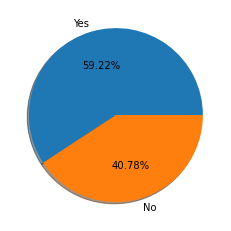

In [45]:
# pie plotting for paperelessbilling


labels = "Yes","No"
fig, ax = plt.subplots()
ax.pie(df["PaperlessBilling"].value_counts(), labels=labels, autopct = "%1.2f%%" ,shadow = True)
plt.show()

yes most of the customer like to have paperlessbill

In [46]:
# checkig the values of PaymentMrthod

df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

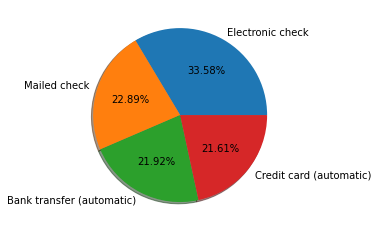

In [47]:
# pie plotting for payemntmethod


labels = "Electronic check","Mailed check","Bank transfer (automatic)","Credit card (automatic)"
fig, ax = plt.subplots()
ax.pie(df["PaymentMethod"].value_counts(), labels=labels, autopct = "%1.2f%%" ,shadow = True)
plt.show()

most of the customer is like to electric check , and  most dont like to use credit card 

In [48]:
# checking the values of Churn

df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

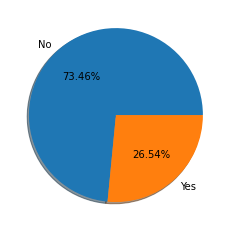

In [49]:
# pie plotting for Churn


labels = "No","Yes"
fig, ax = plt.subplots()
ax.pie(df["Churn"].value_counts(), labels=labels, autopct = "%1.2f%%" ,shadow = True)
plt.show()

most of the customers are without churn

# Bivariate Analysis:

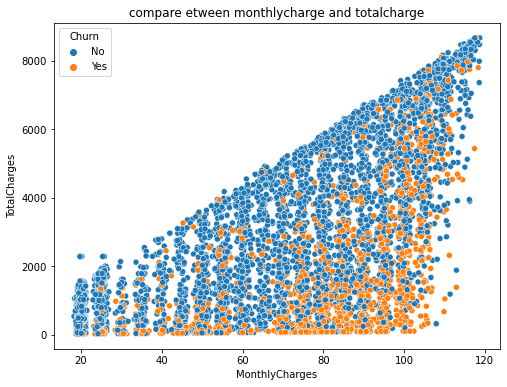

In [50]:
# compare between feature and scatterplot

plt.figure(figsize=[8,6])
plt.title("compare etween monthlycharge and totalcharge")
sns.scatterplot(df["MonthlyCharges"],df["TotalCharges"],hue = df["Churn"]);

we are getting mostly yes 

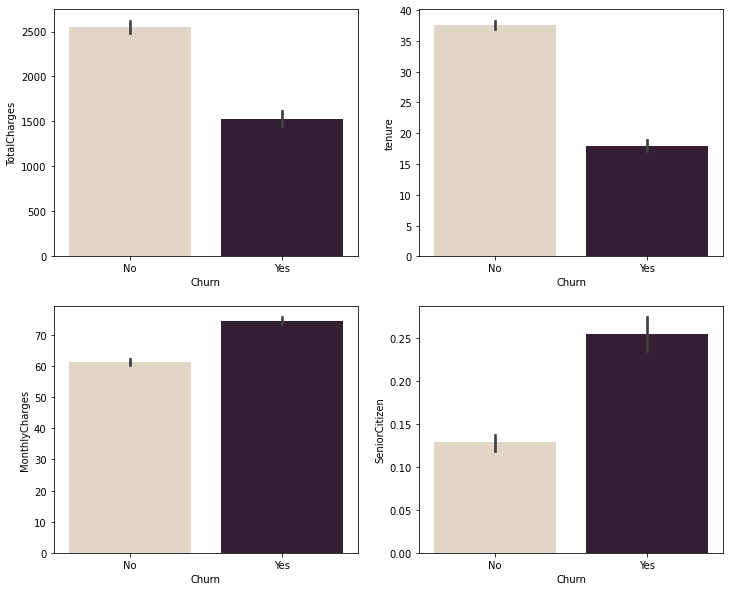

In [51]:
fig,axes=plt.subplots(2,2,figsize=(12,10))

# Checking Churn with TotalCharges
sns.barplot(x='Churn',y='TotalCharges',ax=axes[0,0],data=df,palette='ch:.25')

# Checking Churn with tenure
sns.barplot(x='Churn',y='tenure',ax=axes[0,1],data=df,palette='ch:.25')

# Checking Churn with MonthlyCharges
sns.barplot(x='Churn',y='MonthlyCharges',ax=axes[1,0],data=df,palette='ch:.25')

# Checking Churn with SeniorCitizen
sns.barplot(x='Churn',y='SeniorCitizen',ax=axes[1,1],data=df,palette='ch:.25')

plt.show()

we are getting very diffrent types of observation

if total charges and tenure is high there is no churn

if monthly changes are very high and people is senior citizenship then , we are getting churn

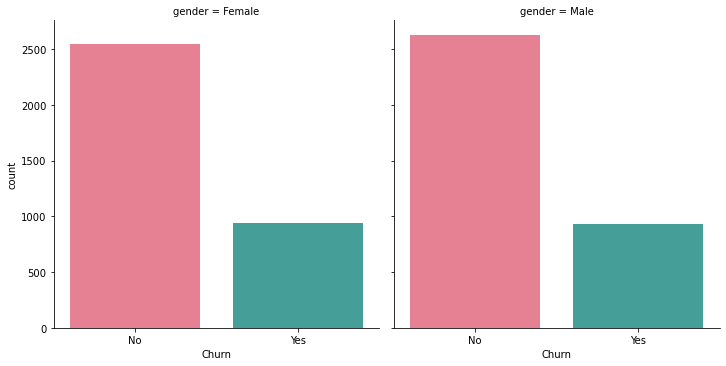

In [52]:
# compare between feature using catplot

sns.catplot(x = "Churn",col = "gender",data = df,kind = "count",palette = "husl")

churns are equal for both sex

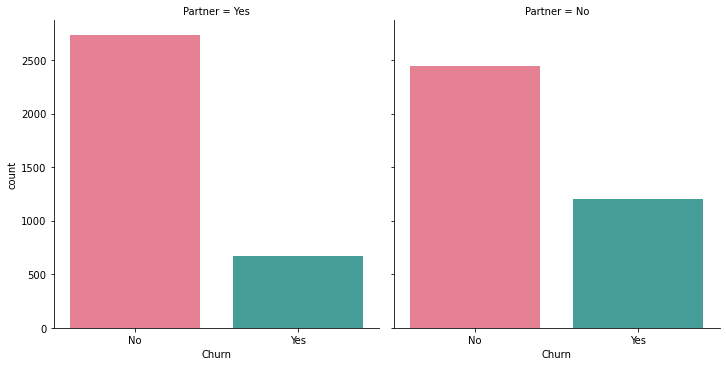

In [53]:
# compare between feature using catplot

sns.catplot(x = "Churn",col = "Partner",data = df,kind = "count",palette = "husl")

customers is with partner is very high

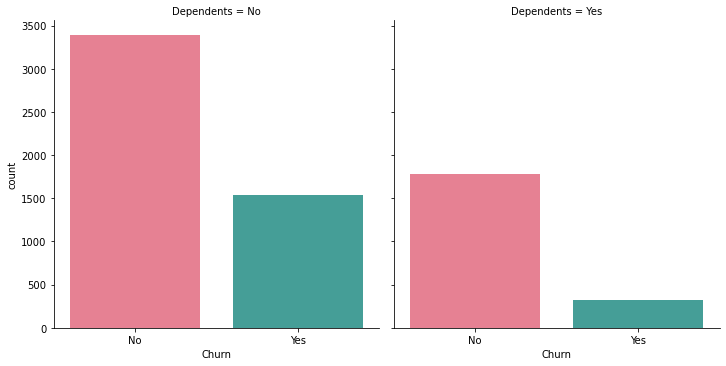

In [54]:
# compare between feature using catplot

sns.catplot(x = "Churn",col = "Dependents",data = df,kind = "count",palette = "husl")

customers with no having dependents is very high , but having dependents is less in number

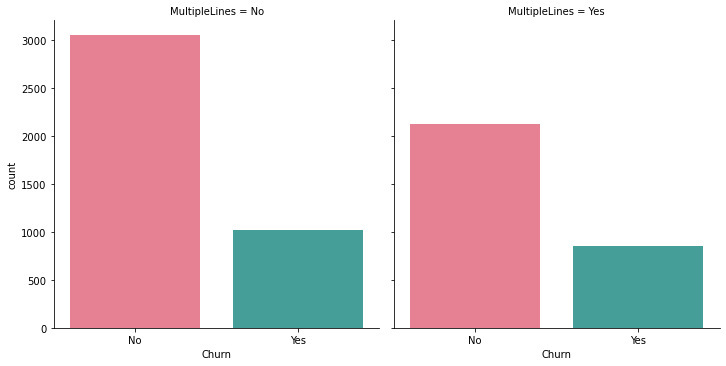

In [55]:
# compare between feature using catplot

sns.catplot(x = "Churn",col = "MultipleLines",data = df,kind = "count",palette = "husl")

Customers with Multiplelines are less in number.And Customers with Multiplelines are less churned.



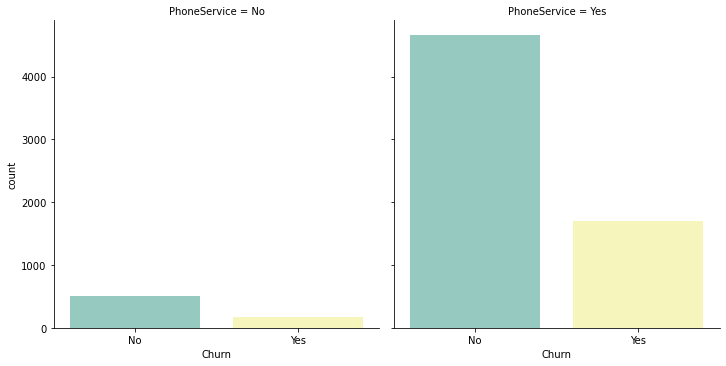

In [56]:
#Comparision between features using cat plot

sns.catplot(x='Churn',col='PhoneService',data=df,kind='count',palette="Set3")


Customers with phoneservice are very high in number which is good.And Customers without Phone service are less churned.

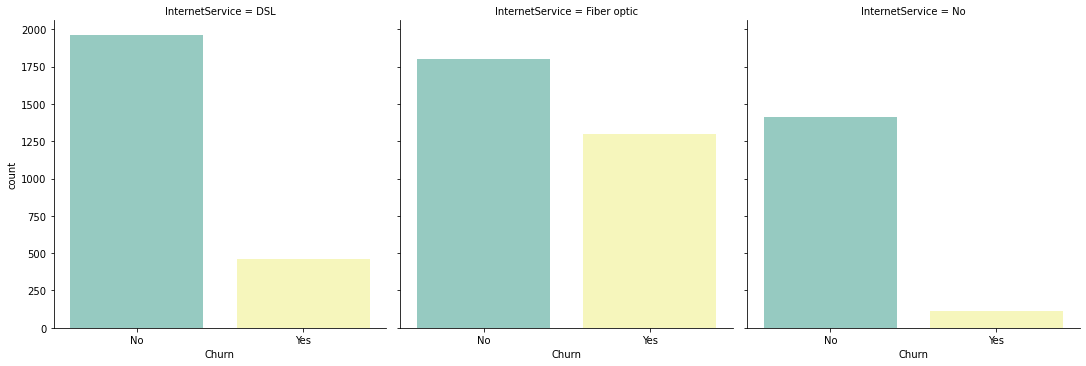

In [57]:
#Comparision between features using cat plot

sns.catplot(x='Churn',col='InternetService',data=df,kind='count',palette="Set3")

customer having fibre is more churned

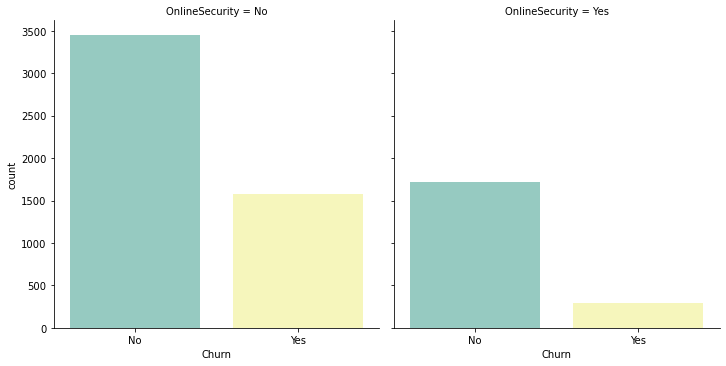

In [58]:
#Comparision between features using cat plot

sns.catplot(x='Churn',col='OnlineSecurity',data=df,kind='count',palette="Set3")

customer which is not having onlinesecurity is more churned

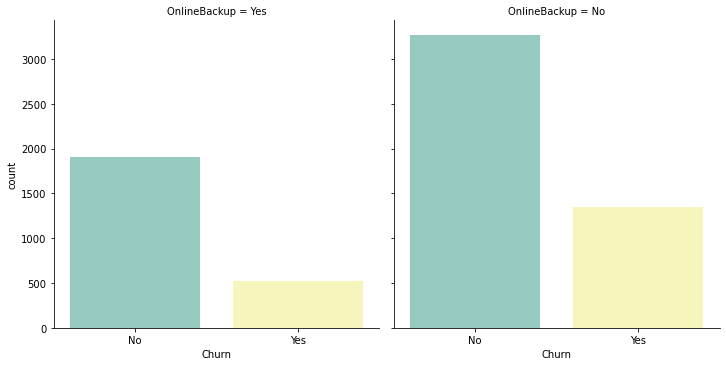

In [59]:
#Comparision between features using cat plot

sns.catplot(x='Churn',col='OnlineBackup',data=df,kind='count',palette="Set3")

customer which don't have onlinebackup have more churn

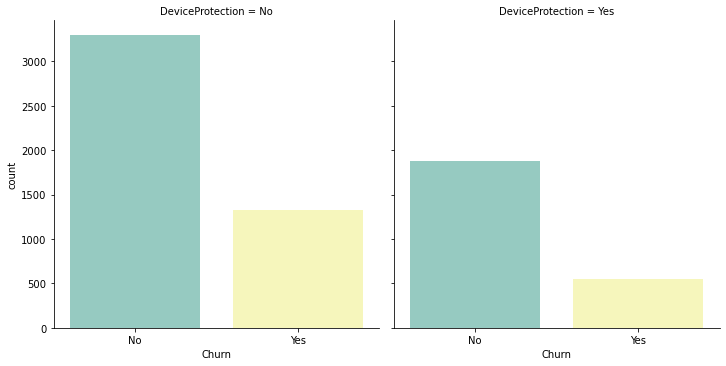

In [60]:
#Comparision between features using cat plot

sns.catplot(x='Churn',col='DeviceProtection',data=df,kind='count',palette="Set3")

customer which not have deviceprotection is more churned

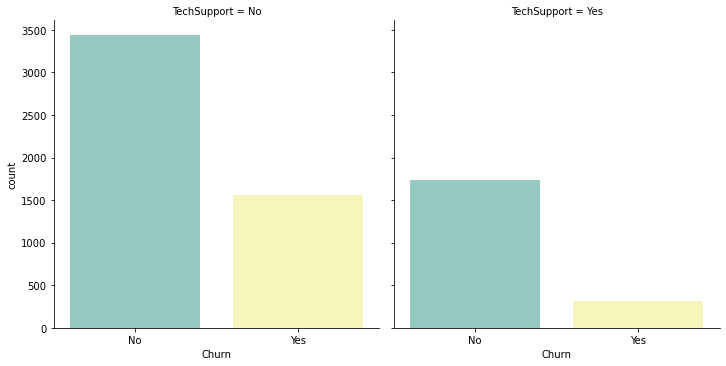

In [61]:
#Comparision between features using cat plot

sns.catplot(x='Churn',col='TechSupport',data=df,kind='count',palette="Set3")

customer which dont have techsupoort has more churned

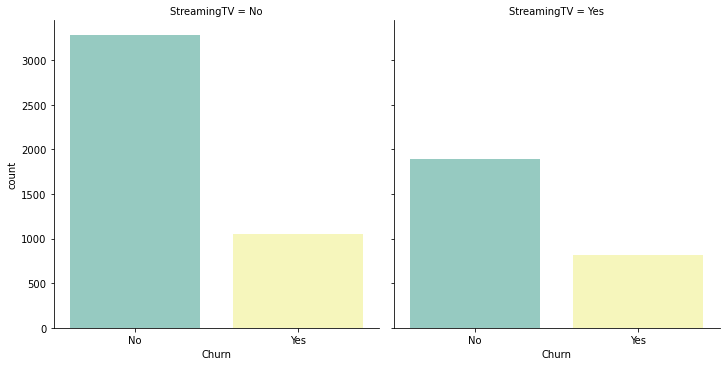

In [62]:
#Comparision between features using cat plot

sns.catplot(x='Churn',col='StreamingTV',data=df,kind='count',palette="Set3")

customers which dont like stramingtv has more chrunched

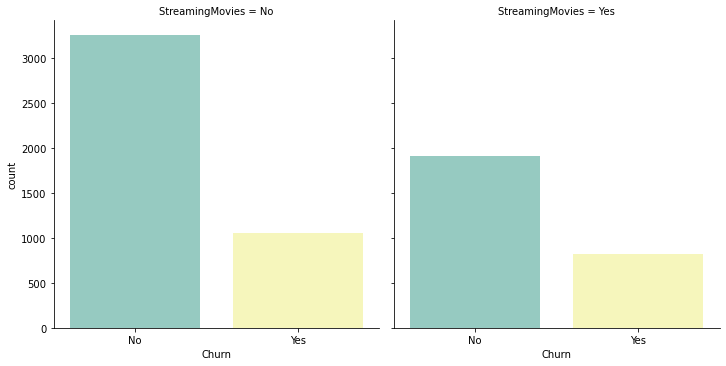

In [63]:
#Comparision between features using cat plot

sns.catplot(x='Churn',col='StreamingMovies',data=df,kind='count',palette="Set3")

customres which dont like sr=treaningmovies has more curnched

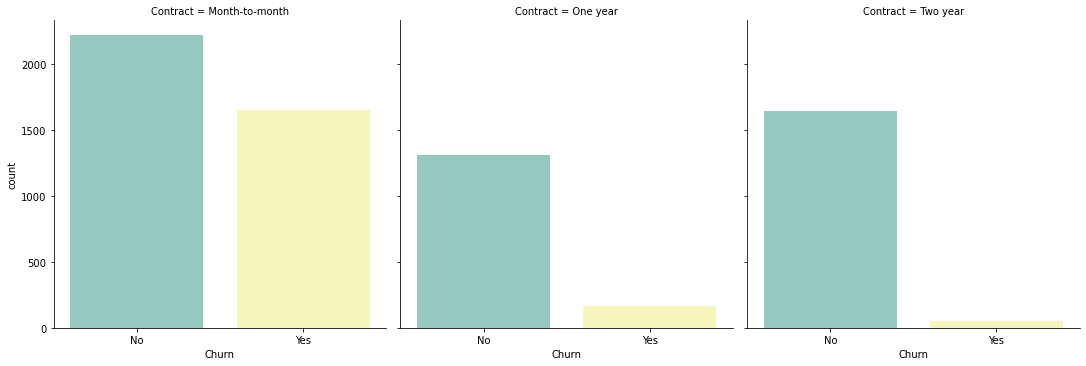

In [64]:
#Comparision between features using cat plot

sns.catplot(x='Churn',col='Contract',data=df,kind='count',palette="Set3")

customers which like month to month has more chrunched

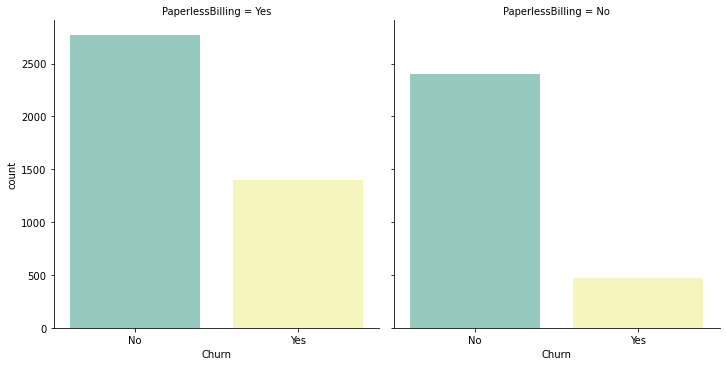

In [65]:
#Comparision between features using cat plot

sns.catplot(x='Churn',col='PaperlessBilling',data=df,kind='count',palette="Set3")

customers which like paperless billing has more crunched

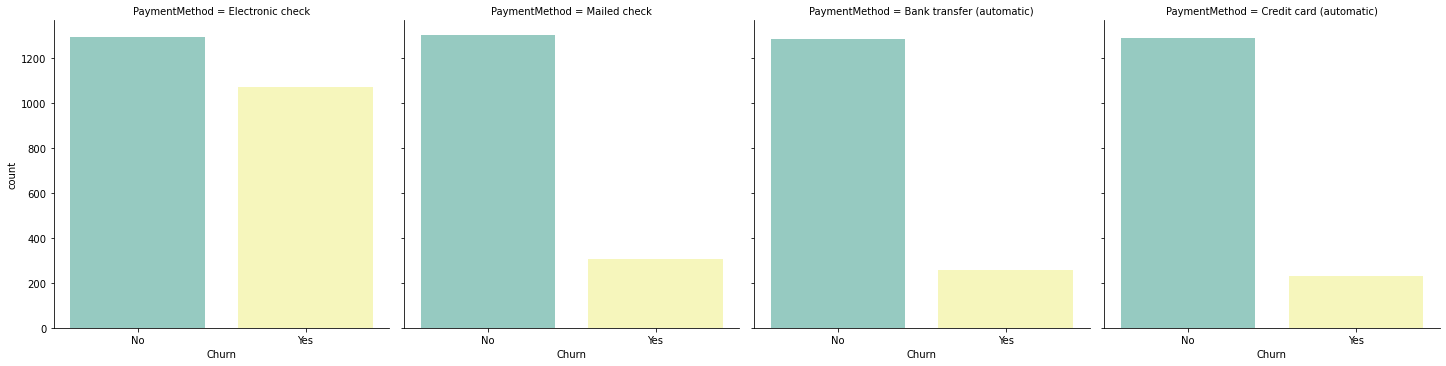

In [66]:
#Comparision between features using cat plot

sns.catplot(x='Churn',col='PaymentMethod',data=df,kind='count',palette="Set3")

Customers With Electronic check payment method are more in number.And Customers With Electronic check payment method are more churned.

# Multivariate Analysis :

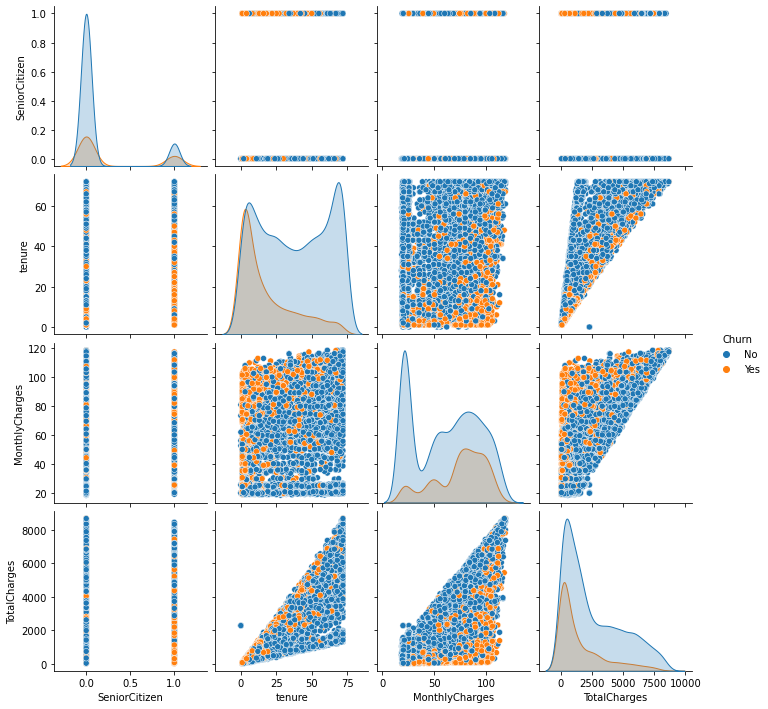

In [67]:
# pair plotting for df

sns.pairplot(df,hue = "Churn")

# checking for outliers

<AxesSubplot:>

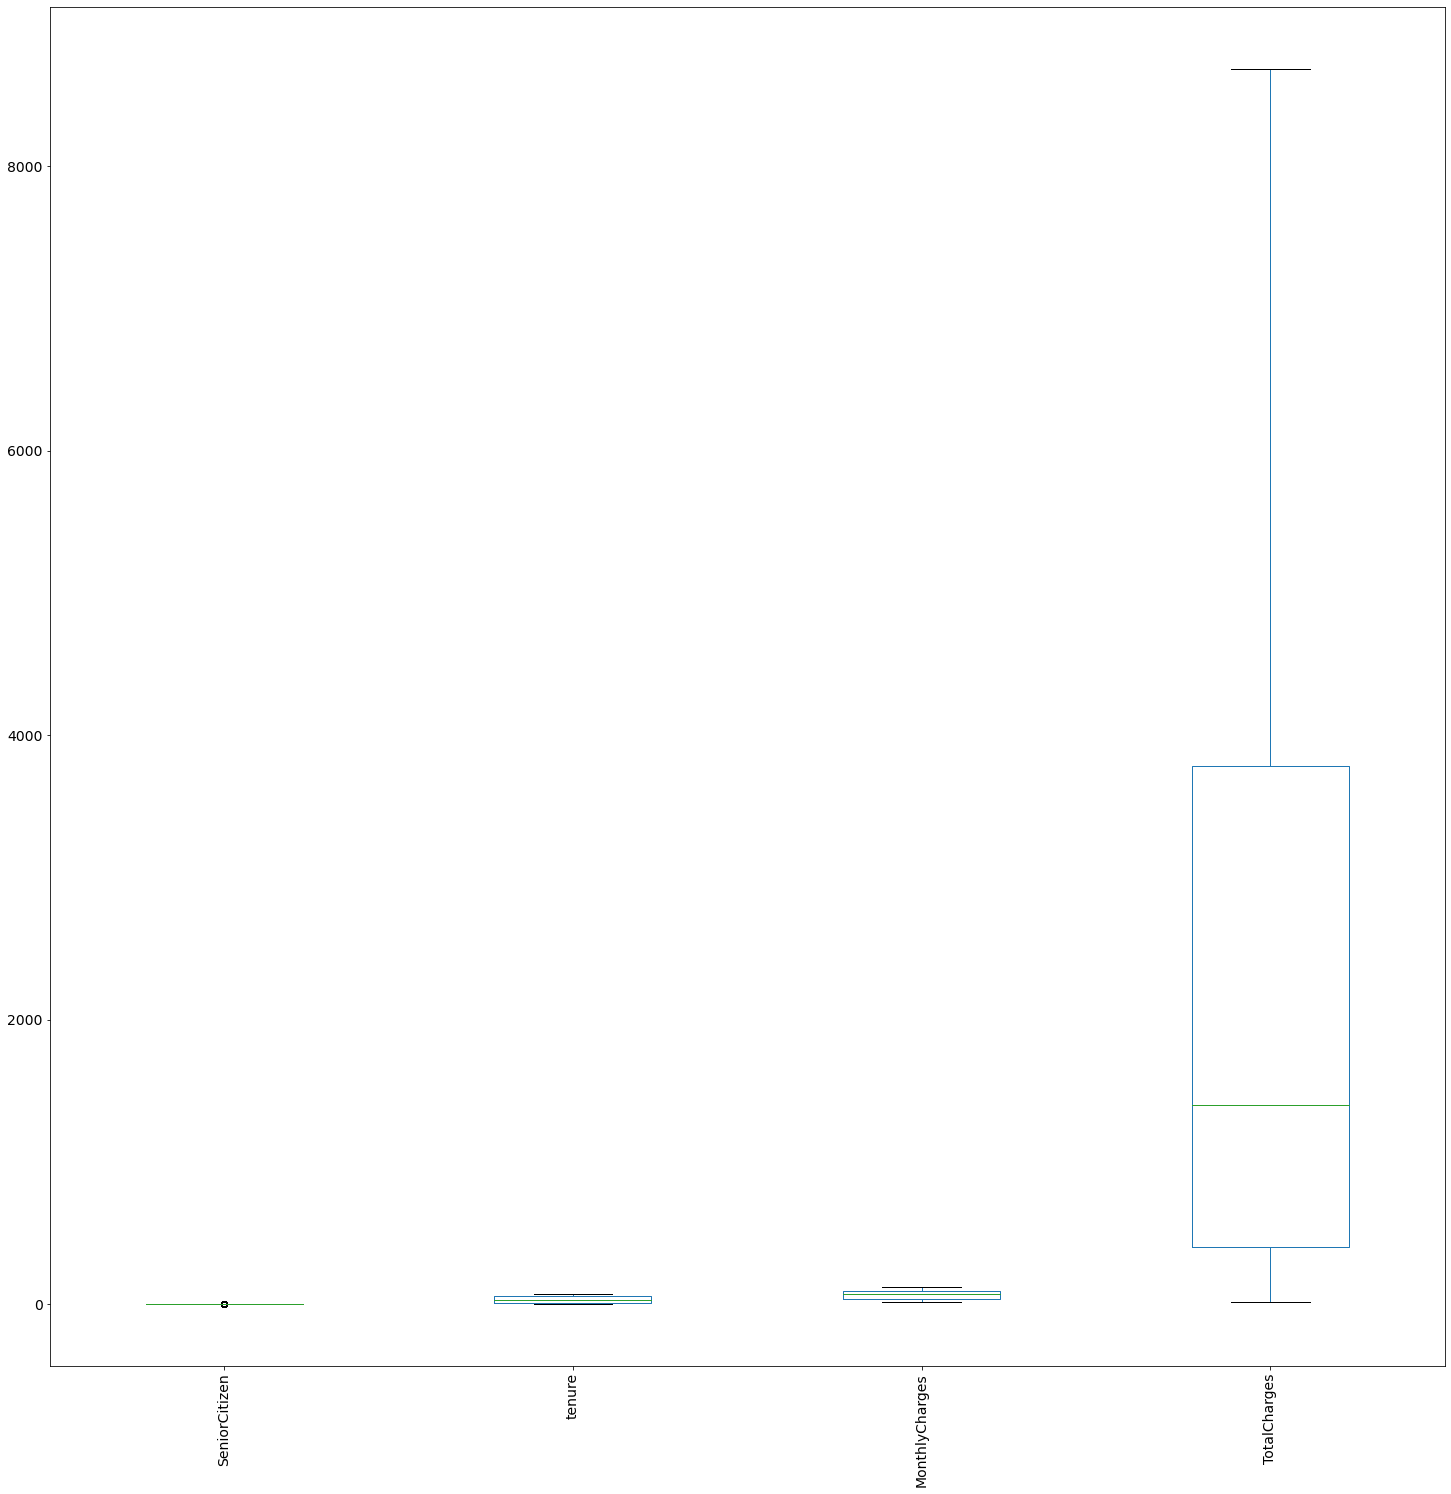

In [68]:
#Checking for outliers using boxplot
df.plot(rot = 90,kind='box',fontsize=14,figsize=(25,25),)

only senior citizen columns is having some outliers , which will be removed 

# Checking for Skewness:

In [69]:
#Checking for skewness
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

only two columns which is having skewness, is seniorcitizen and sceond one is totalcharge

In [70]:
#removing skewness with yeo johnson method

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [71]:
df[['TotalCharges']] = scaler.fit_transform(df[['TotalCharges']].values)

In [72]:
#Checking skewness again
df[['TotalCharges']].skew()

TotalCharges   -0.144899
dtype: float64

# Ordinal Encoding

In [73]:
# Separating categorical columns in df
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [74]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]= OE.fit_transform(df[i].values.reshape(-1,1))

In [75]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,-1.810588,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,0.253313,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,-1.387269,1.0
3,1.0,0,0.0,0.0,45,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,42.30,0.232253,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,-1.250118,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,84.80,0.295688,0.0
7039,0.0,0,1.0,1.0,72,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,103.20,1.567097,0.0
7040,0.0,0,1.0,1.0,11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,-0.859899,0.0
7041,1.0,1,1.0,0.0,4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,-0.922968,1.0


# Checking correlation

In [76]:
cor=df.corr()

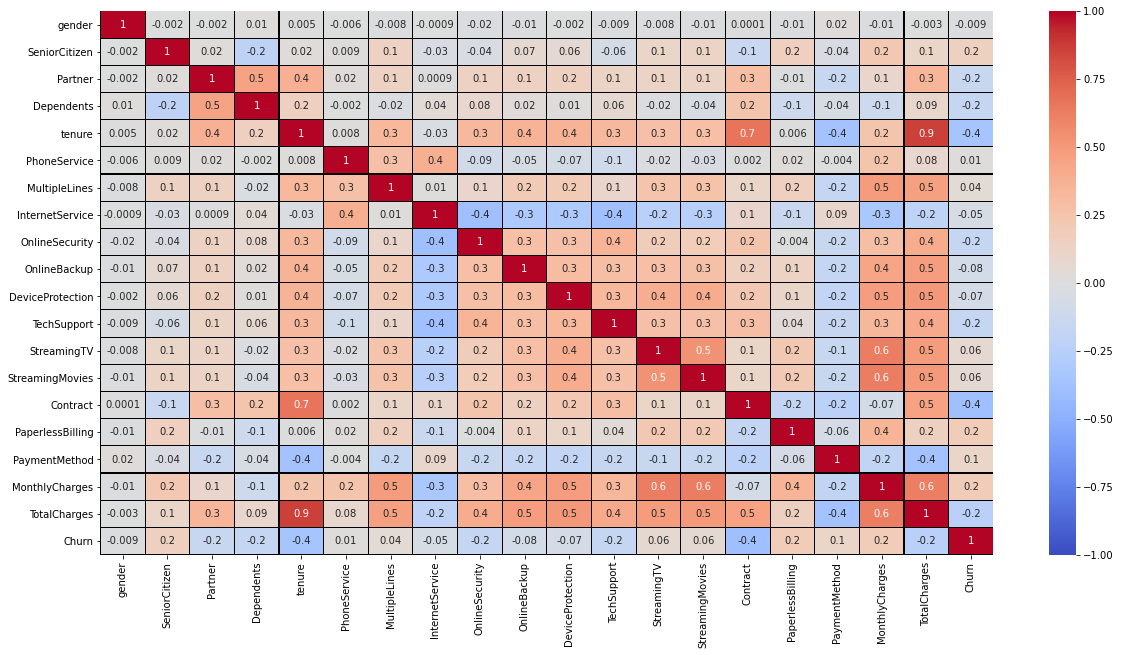

In [77]:
# Visualizing the correlation matrix by plotting heat map.

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

There is a multicolinearity issue between tenure and TotalCharges,Contract and tenure.
With target gender is very less correlated.
To get better insight on target correlation with other features let me plot bar plot of target correlation

In [78]:
# seprating features and label

x = df.drop("Churn",axis=1)
y = df["Churn"]

# Scalling the data using standard bar

In [79]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [80]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,-1.810588
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,0.253313
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,-1.387269
3,1.0,0,0.0,0.0,45,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,42.30,0.232253
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,-1.250118


# chekcing multicolarity using vlf

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.001700,gender
1,1.149699,SeniorCitizen
2,1.463080,Partner
3,1.384360,Dependents
4,10.690330,tenure
5,1.712289,PhoneService
6,1.546815,MultipleLines
7,1.909515,InternetService
8,1.471226,OnlineSecurity
9,1.473860,OnlineBackup


In [82]:
#Droping highly VIF columns
X = X.drop(["TotalCharges"],axis=1)

In [83]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.001700,gender
1,1.149607,SeniorCitizen
2,1.460871,Partner
3,1.382066,Dependents
4,2.754518,tenure
5,1.712012,PhoneService
6,1.538487,MultipleLines
7,1.897435,InternetService
8,1.464039,OnlineSecurity
9,1.469031,OnlineBackup


# Finding best random state and accuracy score

In [84]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [85]:
from sklearn.ensemble import RandomForestClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestClassifier()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8149550402271651  on Random_state  98


got the best score

In [86]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

# Classification Algorithm

In [87]:
#importing necessary libraries.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

# Random Forest Regressor

In [92]:
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
predrf=RFC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predrf))
print('Confusion Matrix:',confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

Accuracy Score: 0.8106956933270232
Confusion Matrix: [[1455  140]
 [ 260  258]]
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88      1595
         1.0       0.65      0.50      0.56       518

    accuracy                           0.81      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.80      0.81      0.80      2113



# Extra tree classifier

In [93]:
ETC=ExtraTreesClassifier()
ETC.fit(X_train,y_train)
predet=ETC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predet))
print('Confusion Matrix:',confusion_matrix(y_test, predet))
print(classification_report(y_test,predet))

Accuracy Score: 0.7927117841930904
Confusion Matrix: [[1430  165]
 [ 273  245]]
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1595
         1.0       0.60      0.47      0.53       518

    accuracy                           0.79      2113
   macro avg       0.72      0.68      0.70      2113
weighted avg       0.78      0.79      0.78      2113



# Gradient Boosting Classifier

In [90]:
GBC=GradientBoostingClassifier()
GBC.fit(X_train,y_train)
predgb=GBC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predgb))
print('Confusion Matrix:',confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))

Accuracy Score: 0.8159015617605301
Confusion Matrix: [[1454  141]
 [ 248  270]]
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88      1595
         1.0       0.66      0.52      0.58       518

    accuracy                           0.82      2113
   macro avg       0.76      0.72      0.73      2113
weighted avg       0.81      0.82      0.81      2113



# Support Vector classifier

In [91]:
SV=SVC()
SV.fit(X_train,y_train)
predsv=SV.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predsv))
print('Confusion Matrix:',confusion_matrix(y_test, predsv))
print(classification_report(y_test,predsv))

Accuracy Score: 0.8031235210601041
Confusion Matrix: [[1460  135]
 [ 281  237]]
              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88      1595
         1.0       0.64      0.46      0.53       518

    accuracy                           0.80      2113
   macro avg       0.74      0.69      0.70      2113
weighted avg       0.79      0.80      0.79      2113



# Cross Validation Score

In [94]:
#Importing library

from sklearn.model_selection import cross_val_score

In [95]:
#cv score for Random Forest Classifier

print(cross_val_score(RFC,X,y,cv=5).mean())

0.7877339868701206


In [96]:
# cv score for Extra Trees Classifier

print(cross_val_score(ETC,X,y,cv=5).mean())

0.7749552390476804


In [97]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GBC,X,y,cv=5).mean())

0.8017890267114007


In [98]:
# cv score for Support Vector Classifier

print(cross_val_score(SV,X,y,cv=5).mean())

0.7996600587134653


 we can see the best model is GBC ....which has maximum score

In [99]:
#importing necessary libraries

from sklearn.model_selection import GridSearchCV

In [100]:
parameter = {'criterion':['friedman_mse'],
             'max_depth': [3],
             'n_estimators':[100],
             'max_features': ['None','auto','sqrt']}

In [101]:
GCV=GridSearchCV(GradientBoostingClassifier(),parameter,cv=5)

In [102]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse'], 'max_depth': [3],
                         'max_features': ['None', 'auto', 'sqrt'],
                         'n_estimators': [100]})

In [103]:
GCV.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 3,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [106]:
churn_mod=GradientBoostingClassifier(criterion='friedman_mse',max_depth=3, max_features='auto', n_estimators=100)
churn_mod.fit(X_train,y_train)
pred=Final_mod.predict(X_test)
acc=accuracy_score(y_test, pred)

print(acc*100)

81.59015617605301


# i got good score...81.5 %

# saving model:

In [107]:
#Saving the model as .pkl file
import joblib
joblib.dump(churn_mod,"CustomerChurn.pkl")

['CustomerChurn.pkl']

# Prediction:

In [108]:
# Loading the saved model
model=joblib.load("CustomerChurn.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([0., 0., 0., ..., 0., 0., 0.])

In [109]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

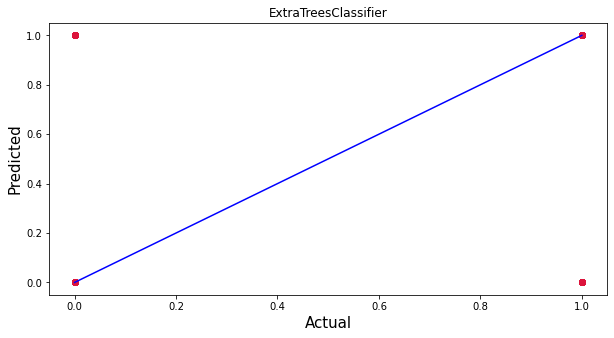

In [110]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("ExtraTreesClassifier")
plt.show()

here we cans ee the actual and prediction view are very similar

# THANK YOU